<a href="https://colab.research.google.com/github/Abhimanyukb/python/blob/master/knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.shape

(150, 6)

In [9]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df=df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [14]:
# taring data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[6. , 2.9, 4.5, 1.5],
       [5. , 3.6, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.5, 1.4, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.8, 2.8, 4.8, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [7.4, 2.8, 6.1, 1.9],
       [6.9, 3.1, 5.4, 2.1],
       [5. , 3.3, 1.4, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3. , 1.4, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3.8, 6.7, 2.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.4, 2.8, 5.6, 2.1],
       [6.2, 2.9, 4.3, 1.3],
       [5.5, 2.3, 4. , 1.3],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2

In [15]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.0852849 , -0.4865906 ,  0.39092574,  0.37683049],
       [-1.09299338,  1.19248965, -1.33094608, -1.30964041],
       [ 0.9100797 , -1.44606503,  1.11300102,  0.76601609],
       [ 0.0852849 ,  0.71275243,  0.39092574,  0.50655902],
       [-0.15037075, -0.96632782,  0.16874873, -0.27181216],
       [-0.26819858, -0.72645921,  0.16874873,  0.11737343],
       [-0.73950989,  1.43235826, -1.27540183, -1.30964041],
       [-1.56430469,  0.71275243, -1.33094608, -1.17991187],
       [ 0.20311273, -0.72645921,  0.11320448,  0.11737343],
       [-0.97516555,  0.95262104, -1.33094608, -1.30964041],
       [ 1.49921884,  0.23301522,  1.22408952,  0.76601609],
       [-0.38602641, -0.246722  ,  0.39092574,  0.37683049],
       [ 0.43876839,  0.47288383,  0.50201424,  0.50655902],
       [ 0.67442405,  0.23301522,  0.72419125,  1.02547315],
       [ 0.55659622, -0.00685339,  0.94636826,  0.76601609],
       [ 1.14573536, -0.00685339,  0.72419125,  1.41465874],
       [-0.97516555,  1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classifier.predict([[4.9,3.0,1.4,0.2]]))

['Iris-virginica']


0.9555555555555556

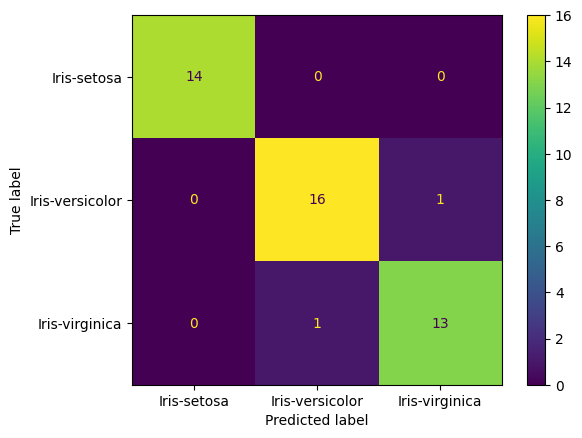

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label=['Iris-setosa','Iris-versicolor','Iris-virginica']
result=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()
score=accuracy_score(y_test,y_pred)
score

In [18]:
result

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]])